##  GRU

### Load data

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd

np.random.seed(1)
tf.random.set_seed(1)

In [2]:
X_test = pd.read_csv('data/bb_test_X.csv')
y_test = pd.read_csv('data/bb_test_y.csv')
X_train = pd.read_csv('data/bb_train_X.csv')
y_train = pd.read_csv('data/bb_train_y.csv')

## Data Transformation

In [3]:
#Target variables need to be an array with integer type
y_train = np.array(y_train)
y_test = np.array(y_test)

y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)

In [4]:
#Check the first 10 values of the train_y data set
y_train[0:10]

array([[0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0]])

In [5]:
#Convert input variables to a 2-D array with float data type
X_train = np.array(X_train)
X_test = np.array(X_test)

X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

In [6]:
X_train

array([[ -3.,  -3.,  -2., ...,  -5.,  -3.,  -7.],
       [  0.,   1.,  -1., ...,  10.,  12.,  15.],
       [ -3.,  -2.,  -2., ...,  14.,  12.,  12.],
       ...,
       [  2.,   6.,   8., ...,  -2.,   1.,   0.],
       [ -2.,   1.,  -1., ..., -19., -21., -14.],
       [  2.,   1.,   3., ...,   0.,   2.,   4.]], dtype=float32)

In [7]:
#Keras expects a different input format:
#Data needs to have 3 dimensions

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [8]:
X_train.shape, y_train.shape

((861, 36, 1), (861, 1))

In [9]:
X_train

array([[[ -3.],
        [ -3.],
        [ -2.],
        ...,
        [ -5.],
        [ -3.],
        [ -7.]],

       [[  0.],
        [  1.],
        [ -1.],
        ...,
        [ 10.],
        [ 12.],
        [ 15.]],

       [[ -3.],
        [ -2.],
        [ -2.],
        ...,
        [ 14.],
        [ 12.],
        [ 12.]],

       ...,

       [[  2.],
        [  6.],
        [  8.],
        ...,
        [ -2.],
        [  1.],
        [  0.]],

       [[ -2.],
        [  1.],
        [ -1.],
        ...,
        [-19.],
        [-21.],
        [-14.]],

       [[  2.],
        [  1.],
        [  3.],
        ...,
        [  0.],
        [  2.],
        [  4.]]], dtype=float32)

# GRU with one layer

In [10]:
n_steps = 36
n_inputs = 1

model = keras.models.Sequential([
    keras.layers.GRU(32, input_shape=[n_steps, n_inputs]),
    keras.layers.Dense(1, activation='sigmoid')
])

In [11]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')

np.random.seed(42)
tf.random.set_seed(42)

optimizer = keras.optimizers.Nadam(learning_rate=0.01)

model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=['accuracy'])

history = model.fit(
    X_train, 
    y_train, 
    epochs=20,
    validation_data=(X_test, y_test),
    callbacks=[early_stop]) # we defined this early_stop callback function earlier

Epoch 1/20
27/27 [==============================] - 2s 29ms/step - loss: 0.4295 - accuracy: 0.7956 - val_loss: 0.3869 - val_accuracy: 0.8320
Epoch 2/20
27/27 [==============================] - 0s 16ms/step - loss: 0.4161 - accuracy: 0.7956 - val_loss: 0.3914 - val_accuracy: 0.8130
Epoch 3/20
27/27 [==============================] - 0s 16ms/step - loss: 0.4177 - accuracy: 0.7991 - val_loss: 0.3891 - val_accuracy: 0.8320
Epoch 4/20
27/27 [==============================] - 0s 16ms/step - loss: 0.4113 - accuracy: 0.7886 - val_loss: 0.3803 - val_accuracy: 0.8320
Epoch 5/20
27/27 [==============================] - 0s 16ms/step - loss: 0.4097 - accuracy: 0.7979 - val_loss: 0.3894 - val_accuracy: 0.8320
Epoch 6/20
27/27 [==============================] - 0s 16ms/step - loss: 0.4067 - accuracy: 0.7967 - val_loss: 0.4068 - val_accuracy: 0.8266
Epoch 7/20
27/27 [==============================] - 0s 16ms/step - loss: 0.4041 - accuracy: 0.8002 - val_loss: 0.3969 - val_accuracy: 0.8157
Epoch 8/20
27

In [12]:
# evaluate the model

scores = model.evaluate(X_test, y_test, verbose=0)
scores

# In results, first is loss, second is accuracy

[0.40902820229530334, 0.8211382031440735]

In [13]:
# extract the accuracy from model.evaluate
print(f"{model.metrics_names[0]:s}: {scores[0]:.2f}")
print(f"{model.metrics_names[1]:s}: {scores[1]*100:.2f}")

loss: 0.41
accuracy: 82.11


In [14]:
# Predictions are probabilities.
y_pred = model.predict(X_test)

12/12 [==============================] - 0s 4ms/step


In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test,np.round(y_pred)))

              precision    recall  f1-score   support

           0       0.83      0.76      0.79       167
           1       0.81      0.87      0.84       202

    accuracy                           0.82       369
   macro avg       0.82      0.82      0.82       369
weighted avg       0.82      0.82      0.82       369



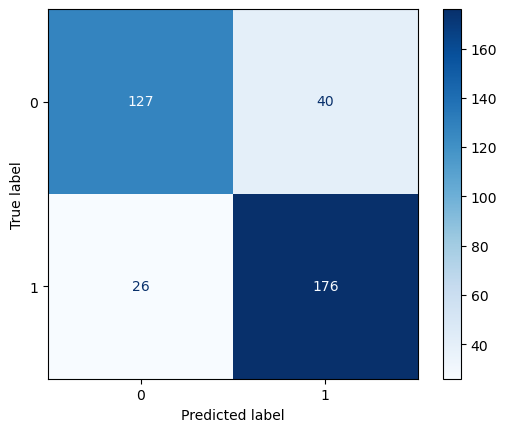

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
c = confusion_matrix(y_test, np.round(y_pred))
disp = ConfusionMatrixDisplay(c)
disp.plot(cmap='Blues')

# GRU with more layers

In [17]:
n_steps = 36
n_inputs = 1

model = keras.models.Sequential([
    keras.layers.GRU(32, return_sequences=True, input_shape=[n_steps, n_inputs]),
    keras.layers.GRU(32, return_sequences=True),
    keras.layers.GRU(32),
    keras.layers.Dense(1, activation='sigmoid')
])

In [18]:
np.random.seed(42)
tf.random.set_seed(42)

optimizer = keras.optimizers.Nadam(learning_rate=0.01)

model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=['accuracy'])

history = model.fit(
    X_train, 
    y_train, 
    epochs=20,
    validation_data=(X_test, y_test), 
    callbacks=[early_stop] # we defined this early_stop callback function earlier
)

Epoch 1/20
27/27 [==============================] - 7s 82ms/step - loss: 0.4544 - accuracy: 0.7921 - val_loss: 0.3937 - val_accuracy: 0.8157
Epoch 2/20
27/27 [==============================] - 1s 47ms/step - loss: 0.4264 - accuracy: 0.7875 - val_loss: 0.4052 - val_accuracy: 0.8184
Epoch 3/20
27/27 [==============================] - 1s 47ms/step - loss: 0.4232 - accuracy: 0.8002 - val_loss: 0.4074 - val_accuracy: 0.8211
Epoch 4/20
27/27 [==============================] - 1s 50ms/step - loss: 0.4207 - accuracy: 0.7875 - val_loss: 0.3866 - val_accuracy: 0.8347
Epoch 5/20
27/27 [==============================] - 1s 49ms/step - loss: 0.4192 - accuracy: 0.8014 - val_loss: 0.4006 - val_accuracy: 0.8130
Epoch 6/20
27/27 [==============================] - 1s 48ms/step - loss: 0.4171 - accuracy: 0.7967 - val_loss: 0.4173 - val_accuracy: 0.8130
Epoch 7/20
27/27 [==============================] - 1s 46ms/step - loss: 0.4095 - accuracy: 0.7898 - val_loss: 0.4030 - val_accuracy: 0.8401
Epoch 8/20
27

In [19]:
# evaluate the model

scores = model.evaluate(X_test, y_test, verbose=0)
scores

# In results, first is loss, second is accuracy

[0.424969881772995, 0.8130081295967102]

In [20]:
# extract the accuracy from model.evaluate

print("%s: %.2f" % (model.metrics_names[0], scores[0]))
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


loss: 0.42
accuracy: 81.30%


In [21]:
# Predictions are probabilities.
y_pred = model.predict(X_test)

12/12 [==============================] - 1s 11ms/step


In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test,np.round(y_pred)))

              precision    recall  f1-score   support

           0       0.85      0.71      0.78       167
           1       0.79      0.90      0.84       202

    accuracy                           0.81       369
   macro avg       0.82      0.80      0.81       369
weighted avg       0.82      0.81      0.81       369



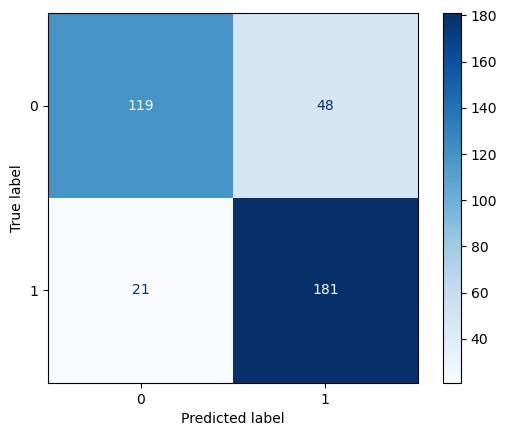

In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
c = confusion_matrix(y_test, np.round(y_pred))
disp = ConfusionMatrixDisplay(c)
disp.plot(cmap='Blues')